In [1]:
import pandas as pd           
import matplotlib.pyplot as plt  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
filepath='Stress.csv'

In [3]:
data=pd.read_csv(filepath)

## **Data Exploration**

In [4]:
data.iloc[:6]

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1517274027


In [5]:
data.iloc[0]['text']

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

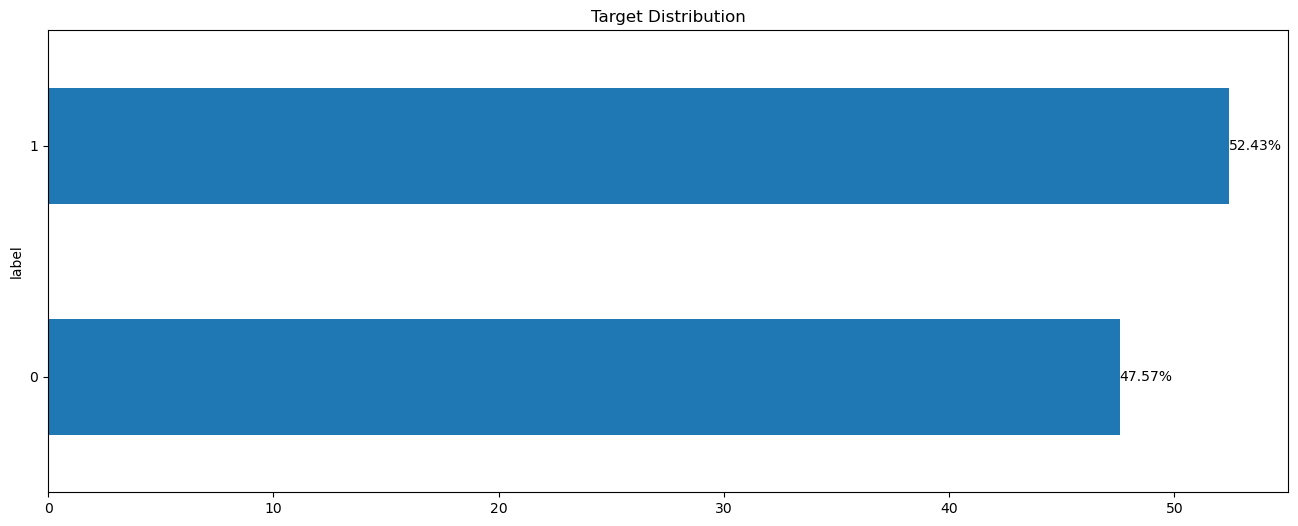

In [6]:
ax=(data['label'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6),title='Target Distribution')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.show()

## **Data Cleaning**

In [7]:
def show(df):
    for index,content in enumerate(df):
        if index <= 5:
            print(content)
        else:
            break

#### **i) Clean Text**

In [8]:
import re 
import string

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [9]:
data['text']=data['text'].apply(wordopt)

In [10]:
show(data['text'])

he said he had not felt that way before  suggeted i go rest and so   trigger ahead if youi re a hypocondriac like me  i decide to look up  feelings of doom  in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy  a stupid  are you psychic  test or new age b s   something i could even laugh at down the road  no  i ended up reading that this sense of doom can be indicative of various health ailments  one of which i am prone to   so on top of my  doom  to my gloom  i am now f n worried about my heart  i do happen to have a physical in  hours 
hey there r assistance  not sure if this is the right place to post this   but here goes    i m currently a student intern at sandia national labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country  we re looking for current undergrad grad stem students so if you re a stem student or know stem students  i would greatly appreciate if you can help take or p

#### **ii) Tokenization**

In [11]:
data['text']=data['text'].apply(word_tokenize)

In [12]:
show(data['text'])

['he', 'said', 'he', 'had', 'not', 'felt', 'that', 'way', 'before', 'suggeted', 'i', 'go', 'rest', 'and', 'so', 'trigger', 'ahead', 'if', 'youi', 're', 'a', 'hypocondriac', 'like', 'me', 'i', 'decide', 'to', 'look', 'up', 'feelings', 'of', 'doom', 'in', 'hopes', 'of', 'maybe', 'getting', 'sucked', 'into', 'some', 'rabbit', 'hole', 'of', 'ludicrous', 'conspiracy', 'a', 'stupid', 'are', 'you', 'psychic', 'test', 'or', 'new', 'age', 'b', 's', 'something', 'i', 'could', 'even', 'laugh', 'at', 'down', 'the', 'road', 'no', 'i', 'ended', 'up', 'reading', 'that', 'this', 'sense', 'of', 'doom', 'can', 'be', 'indicative', 'of', 'various', 'health', 'ailments', 'one', 'of', 'which', 'i', 'am', 'prone', 'to', 'so', 'on', 'top', 'of', 'my', 'doom', 'to', 'my', 'gloom', 'i', 'am', 'now', 'f', 'n', 'worried', 'about', 'my', 'heart', 'i', 'do', 'happen', 'to', 'have', 'a', 'physical', 'in', 'hours']
['hey', 'there', 'r', 'assistance', 'not', 'sure', 'if', 'this', 'is', 'the', 'right', 'place', 'to', '

#### **iii) Remove Stopwords**

In [13]:
def remove_stopwords(text):
    stpw=set(stopwords.words('english'))
    filtered_text=[word for word in text if word not in stpw]
    return filtered_text

In [14]:
data['text']=data['text'].apply(remove_stopwords)

In [15]:
show(data['text'])

['said', 'felt', 'way', 'suggeted', 'go', 'rest', 'trigger', 'ahead', 'youi', 'hypocondriac', 'like', 'decide', 'look', 'feelings', 'doom', 'hopes', 'maybe', 'getting', 'sucked', 'rabbit', 'hole', 'ludicrous', 'conspiracy', 'stupid', 'psychic', 'test', 'new', 'age', 'b', 'something', 'could', 'even', 'laugh', 'road', 'ended', 'reading', 'sense', 'doom', 'indicative', 'various', 'health', 'ailments', 'one', 'prone', 'top', 'doom', 'gloom', 'f', 'n', 'worried', 'heart', 'happen', 'physical', 'hours']
['hey', 'r', 'assistance', 'sure', 'right', 'place', 'post', 'goes', 'currently', 'student', 'intern', 'sandia', 'national', 'labs', 'working', 'survey', 'help', 'improve', 'marketing', 'outreach', 'efforts', 'many', 'schools', 'recruit', 'around', 'country', 'looking', 'current', 'undergrad', 'grad', 'stem', 'students', 'stem', 'student', 'know', 'stem', 'students', 'would', 'greatly', 'appreciate', 'help', 'take', 'pass', 'along', 'short', 'survey', 'thank', 'everyone', 'helps', 'take', 's

#### **iv) Lemmatization**

In [16]:
def lemmatize_words(text):
    lemmer=WordNetLemmatizer()
    lemmatized_text=[lemmer.lemmatize(word,pos='v') for word in text]
    return lemmatized_text

In [17]:
data['text']=data['text'].apply(lemmatize_words)

In [18]:
show(data['text'])

['say', 'felt', 'way', 'suggeted', 'go', 'rest', 'trigger', 'ahead', 'youi', 'hypocondriac', 'like', 'decide', 'look', 'feel', 'doom', 'hop', 'maybe', 'get', 'suck', 'rabbit', 'hole', 'ludicrous', 'conspiracy', 'stupid', 'psychic', 'test', 'new', 'age', 'b', 'something', 'could', 'even', 'laugh', 'road', 'end', 'read', 'sense', 'doom', 'indicative', 'various', 'health', 'ailments', 'one', 'prone', 'top', 'doom', 'gloom', 'f', 'n', 'worry', 'heart', 'happen', 'physical', 'hours']
['hey', 'r', 'assistance', 'sure', 'right', 'place', 'post', 'go', 'currently', 'student', 'intern', 'sandia', 'national', 'labs', 'work', 'survey', 'help', 'improve', 'market', 'outreach', 'efforts', 'many', 'school', 'recruit', 'around', 'country', 'look', 'current', 'undergrad', 'grad', 'stem', 'students', 'stem', 'student', 'know', 'stem', 'students', 'would', 'greatly', 'appreciate', 'help', 'take', 'pass', 'along', 'short', 'survey', 'thank', 'everyone', 'help', 'take', 'survey', 'enter', 'draw', 'chance'

In [19]:
data['length']=data['text'].apply(lambda x : len(x))

#### **v) Create a Corpus**

In [20]:
data['text']=data['text'].apply(lambda x : ' '.join([index for index in x]))

In [21]:
show(data['text'])

say felt way suggeted go rest trigger ahead youi hypocondriac like decide look feel doom hop maybe get suck rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road end read sense doom indicative various health ailments one prone top doom gloom f n worry heart happen physical hours
hey r assistance sure right place post go currently student intern sandia national labs work survey help improve market outreach efforts many school recruit around country look current undergrad grad stem students stem student know stem students would greatly appreciate help take pass along short survey thank everyone help take survey enter draw chance win one three amazon gcs
mom hit newspaper shock would know like play hit smack strike hit violence sort person send vibe ask universe yesterday decide take friend go help another friend move new place drive friend move strike shoulder address immediately time tell things friend drive nearly get collision another car think

## **Model Developement**

In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC

#### **i) Choose Relevant Features**

In [23]:
X=data['text']
y=data['label']

#### **ii) Split into Train/Test Sets**

In [24]:
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,test_size=0.25)

#### **iii) Vectorization**

In [25]:
vect=TfidfVectorizer()

In [26]:
X_train=vect.fit_transform(X_train)
X_val=vect.transform(X_val)

#### **iv) Build and Fit Model**

In [27]:
model=SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

#### **v) Model Evaluation**

In [28]:
y_pred=model.predict(X_val)
accuracy_score(y_val,y_pred)

0.723943661971831

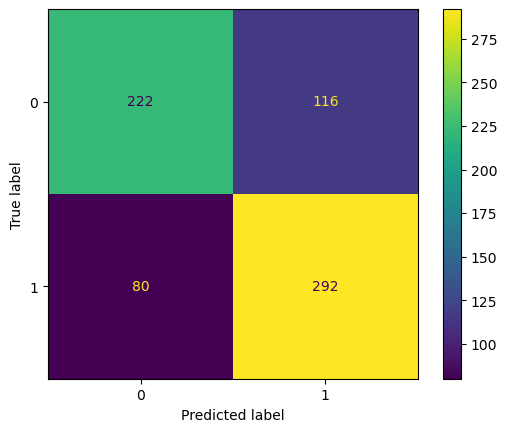

In [29]:
cm=confusion_matrix(y_val,y_pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm)  
dis.plot()

#### **vi) Model Testing**

In [30]:
input=pd.DataFrame({
    'text':['why do i need to live?']
})

In [31]:
input['text']=input['text'].apply(word_tokenize)
input['text']=input['text'].apply(remove_stopwords)
input['text']=input['text'].apply(lemmatize_words)
input['text']=input['text'].apply(lambda x : ' '.join([index for index in x]))

In [32]:
input

,text
0,need live ?


In [33]:
X_valid=vect.transform(input['text'])

In [34]:
X_valid

<1x7489 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [35]:
input['predicted']=model.predict(X_valid)
input['predicted']=input['predicted'].apply(lambda x : 'Stress' if x == 1 else 'Not Stress')

In [36]:
input

,text,predicted
0,need live ?,Stress


In [37]:
import joblib

# Save the trained model to a .sav file
joblib.dump(model, 'stress_check.sav')


['stress_check.sav']

In [38]:
# Save the trained model to a .sav file
joblib.dump(vect, 'Vectorizer.sav')

['Vectorizer.sav']